

---



**IMPORTS**


---



In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from keras.optimizers import Adam
from keras.models import Sequential
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.losses import sparse_categorical_crossentropy
from keras.layers import Dense, RepeatVector, TimeDistributed, Input, LSTM, Embedding, Dropout



---
**LOADING DATASET**

---





In [ ]:
from google.colab import drive
drive.mount('/content/drive')

!cp ./drive/MyDrive/en-ru.zip ./
!unzip en-ru.zip

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
^C
Archive:  en-ru.zip
  End-of-central-directory signature not found.  Either this file is not
  a zipfile, or it constitutes one disk of a multi-part archive.  In the
  latter case the central directory and zipfile comment will be found on
  the last disk(s) of this archive.
unzip:  cannot find zipfile directory in one of en-ru.zip or
        en-ru.zip.zip, and cannot find en-ru.zip.ZIP, period.




---
**READING DATA**


---





In [ ]:
def read_text(filename):
    with open (filename, 'r') as f:
        text = f.read()
    return text.split('\n')

In [ ]:
text = read_text("en-ru.txt")
text = text[1:20001]

eng, rus = [], []
for i in text:
    __eng, __rus = i.split('\t')
    eng += [__eng]
    rus += [__rus]
    



---


**PRE - PROCESSING**



---



In [ ]:
def tokenize(data):
    data_tokenizer = Tokenizer(char_level = False)
    data_tokenizer.fit_on_texts(data)
    return data_tokenizer.texts_to_sequences(data), data_tokenizer

def pad(data, length=None):
    if length is None:
        length = max([len(i) for i in data])
    return pad_sequences(data, maxlen = length, padding = 'post')

def preprocess(data):
    prep_data, data_tokenizer = tokenize(data)
    prep_data = pad(prep_data)

    return prep_data, data_tokenizer

def idx2text(idx, tokenizer):
    idx2word = {id: word for word, id in tokenizer.word_index.items()}
    idx2word[0] = ''

    return ' '.join([idx2word[i] for i in np.argmax(idx, 1)])

In [ ]:
eng_s, eng_tok = preprocess(eng)
rus_s, rus_tok = preprocess(rus)
rus_s = rus_s.reshape(*rus_s.shape, 1)



---


**MODEL CREATION**



---



In [ ]:
def model(input_shape, output_length, rus_vs):
  
    model = Sequential()
    
    model.add(Embedding(rus_vs, 64, input_length=input_shape[1]))
    model.add(LSTM(64, return_sequences=False))
    model.add(Dropout(0.25))

    model.add(RepeatVector(output_length))
    model.add(LSTM(64, return_sequences=True))
    model.add(Dropout(0.25))

    model.add(TimeDistributed(Dense(rus_vs, activation='softmax')))
    
    model.compile(loss=sparse_categorical_crossentropy, 
                 optimizer=Adam(1e-3), metrics=['accuracy'])
    
    return model



---


**TRAINING**



---



In [ ]:
_x = pad(eng_s, rus_s.shape[1])
_x = _x.reshape((-1, rus_s.shape[-2], 1))

model = model(_x.shape, rus_s.shape[1], len(rus_tok.word_index))
model.summary()

hist = model.fit(_x, rus_s, batch_size=35, epochs=10, validation_split=0.2)

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_7 (Embedding)      (None, 176, 64)           4239296   
_________________________________________________________________
lstm_2 (LSTM)                (None, 64)                33024     
_________________________________________________________________
dropout_12 (Dropout)         (None, 64)                0         
_________________________________________________________________
repeat_vector_7 (RepeatVecto (None, 176, 64)           0         
_________________________________________________________________
lstm_3 (LSTM)                (None, 176, 64)           33024     
_________________________________________________________________
dropout_13 (Dropout)         (None, 176, 64)           0         
_________________________________________________________________
time_distributed_7 (TimeDist (None, 176, 66239)       



---


**PLOTS**



---



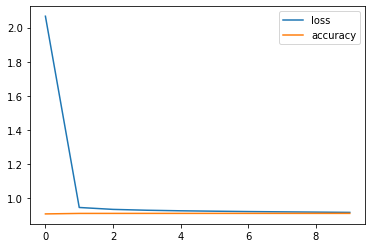

In [ ]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['accuracy'])
plt.legend(['loss','accuracy'])
plt.show()



---


**EVALUATION**



---



In [ ]:
test = read_text('eval-ru-100.txt')
test_s, test_tk = preprocess(test)
test_x = pad(test_s, rus_s.shape[1])
test_x = test_x.reshape((-1, rus_s.shape[-2], 1))

res = []
for i in range(len(test_x)):
    res += [idx2text(model.predict(test_x[i:i+1])[0], rus_tok)]
    print(idx2text(model.predict(test_x[i:i+1])[0], rus_tok))

with open('answer.txt', 'w') as f:
    f.write('\n'.join(res)) 

в в <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> 